In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df = pd.read_csv('result.csv')

def clean(text):
    import re
    import nltk
    from nltk.util import pr
    from nltk.corpus import stopwords
    import string
    stopword = set(stopwords.words("english"))
    text = str(text).lower()
    text = re.sub('[.?]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text


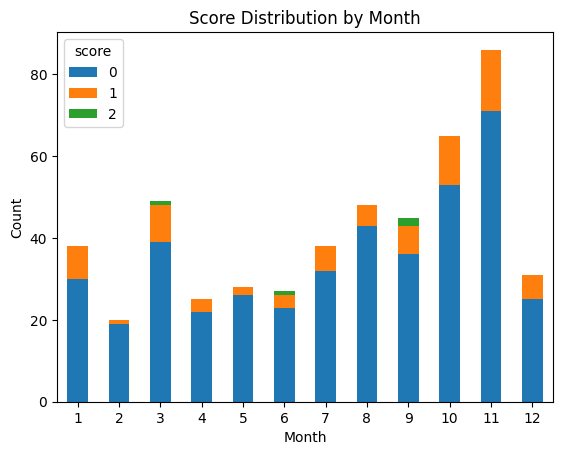

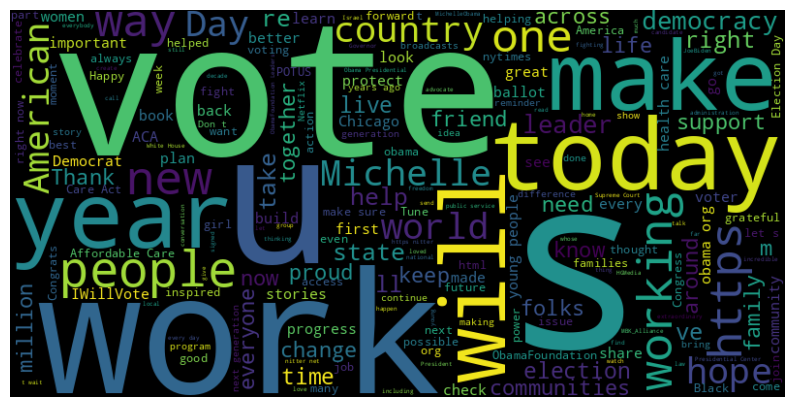

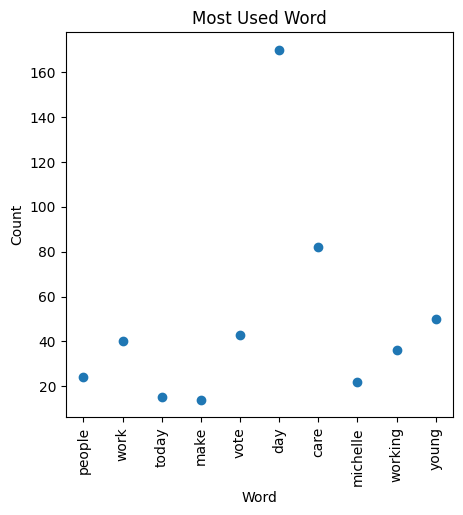

In [2]:
grouped = df.groupby(['Month', 'score']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Score Distribution by Month')
plt.xticks(rotation=0)
plt.legend(title='score')
plt.show()

# Concatenate all text data in the dataframe
text_data = ' '.join(df['text'].astype(str))
df['text'] = df['text'].apply(clean)
df['text'] = df['text'].fillna('')


cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['text'])
Xc = (X.T * X)
Xc.setdiag(0)
coocc_ar = Xc.toarray()

wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

most_used_word = cv.get_feature_names_out()
most_used_word = np.array(most_used_word)
most_used_word = most_used_word[np.argsort(np.sum(coocc_ar, axis=0))][::-1]


plt.figure(figsize=(5, 5))
plt.scatter(most_used_word[:10], np.sum(coocc_ar, axis=0)[:10])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Used Word')
plt.xticks(rotation=90)
plt.show()


In [3]:
import io
import base64
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Convert the image to a base64-encoded string
image_base64 = base64.b64encode(buffer.getvalue()).decode()
plt.close()  # Close the plot to release memory

print(image_base64)

iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAIyUlEQVR4nO3WMQEAIAzAMMC/5+ECjiYKenbPzCwAADLO7wAAAN4ygAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAA

In [4]:
# dont forgot to run this part use in backend!
import dill
def visualization():
    import matplotlib
    import io
    import base64
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    matplotlib.use('agg')

    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"

    result_csv = os.path.join(base_dir, models_folder, csv_path)

    df = pd.read_csv(result_csv)
    grouped = df.groupby(['Month', 'score']).size().unstack(fill_value=0)

    grouped.plot(kind='bar', stacked=True)
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Score Distribution by Month')
    plt.xticks(rotation=0)
    plt.legend(title='score')

    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

# with open('../backend/textback/models/visualization.pkl', 'wb') as f:
#     dill.dump(visualization, f)

In [5]:
# dont forgot to run this part use in backend!
def word_cloud():
    import pandas as pd
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import os
    import matplotlib
    from sklearn.feature_extraction.text import CountVectorizer
    import io
    import base64
    buffer = io.BytesIO()
    matplotlib.use('agg')

    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"
    clean_path = "clean_function.pkl"

    result_csv = os.path.join(base_dir, models_folder, csv_path)
    clean = os.path.join(base_dir, models_folder, clean_path)

    df = pd.read_csv(result_csv)
    # Concatenate all text data in the dataframe
    text_data = ' '.join(df['text'].astype(str))
    df['text'] = df['text'].apply(clean)
    df['text'] = df['text'].fillna('')
    
    cv = CountVectorizer(stop_words='english')
    X = cv.fit_transform(df['text'])
    Xc = (X.T * X)
    Xc.setdiag(0)
    
    wordcloud = WordCloud(width=800, height=400).generate(text_data)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

with open('../backend/textback/models/wordcloud.pkl', 'wb') as f:
    dill.dump(word_cloud, f)

In [6]:
# dont forgot to run this part use in backend!
import dill
def mostuseword():
    from sklearn.feature_extraction.text import CountVectorizer
    import numpy as np
    import pandas as pd
    import os
    import base64
    import io
    import matplotlib.pyplot as plt
    import matplotlib
    buffer = io.BytesIO()
    matplotlib.use('agg')
    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"

    result_csv = os.path.join(base_dir, models_folder, csv_path)

    df = pd.read_csv(result_csv)
    df['text'] = df['text'].apply(clean)
    df['text'] = df['text'].fillna('')

    cv = CountVectorizer(stop_words='english')
    X = cv.fit_transform(df['text'])
    Xc = (X.T * X)
    Xc.setdiag(0)
    coocc_ar = Xc.toarray()

    most_used_word = cv.get_feature_names_out()
    most_used_word = np.array(most_used_word)
    most_used_word = most_used_word[np.argsort(np.sum(coocc_ar, axis=0))][::-1]

    plt.figure(figsize=(5, 5))
    plt.scatter(most_used_word[:10], np.sum(coocc_ar, axis=0)[:10])
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title('Most Used Word')
    plt.xticks(rotation=90)
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

with open('../backend/textback/models/mostword.pkl', 'wb') as f:
    dill.dump(mostuseword, f)


In [7]:
# # use to check image_base64 work or not
# import base64
# from PIL import Image
# from io import BytesIO

# def base64_to_image(base64_string):
#     # Decode the Base64 string to bytes
#     image_data = base64.b64decode(base64_string)
    
#     # Create a BytesIO object to wrap the decoded image data
#     image_buffer = BytesIO(image_data)
    
#     # Open the image using PIL
#     image = Image.open(image_buffer)
    
#     return image

# image_Decode = mostuseword()
# final_image = base64_to_image(image_Decode)
# final_image.show()